## NBA SEASON DATA

### **Análisis del rendimiento de los jugadores de la NBA por temporada de 1978-2016**

### Resumen 
Este proyecto de análisis de datos se enfoca en explorar las dinámicas del rendimiento de los jugadores de la NBA a lo largo de cuatro décadas (1978-2016), con el propósito de comprender la influencia de factores como la edad, el true shooting y características físicas en el desempeño individual y colectivo de los equipos.

### Introducción
La NBA ha sido un escenario de cambios y transformaciones constantes a lo largo de su historia. Este proyecto tiene como objetivo arrojar luz sobre la relación entre el rendimiento de los jugadores y factores clave como la edad, el true shooting y otras características físicas y de experiencia.

**Contexto comercial**
La National Basketball Association (NBA) es una de las ligas deportivas más populares y competitivas del mundo, con millones de seguidores y un mercado en constante crecimiento. La capacidad de evaluar y comprender el rendimiento de los jugadores es fundamental para los equipos, entrenadores y directores generales, ya que les permite tomar decisiones informadas para mejorar el desempeño del equipo, tomar decisiones de contratación y maximizar el valor de los jugadores.

**Problema comercial**
Evaluar el rendimiento de los jugadores tanto indivudualmente como dentro del equipo, identificar fortalezas y debilidades, y tomar decisiones estratégicas sobre la alineación y la gestión de minutos.

Para la gestión de personal y la toma de decisiones en el draft, es importante evaluar el potencial de los jugadores. Los equipos pueden utilizar datos históricos y estadísticas avanzadas para identificar talentos emergentes y tomar decisiones de contratación informadas.

## Objetivos:

* Predecir el rendimiento de un jugador con base a la posición en la que juega. Las variables de rendimiento que se usaran son tanto globales como el PER (Player Efficiency Rating) y el BPM (Box Plus-Minus) como individuales como ts(True Shooting Percentage) , trb (Total Rebound Percentage), ast (Assist Percentage), stl (Steal Percentage), blk (Block Percentage), tov (Turnover Percentage) del jugador.


## Hipótesis:
Hipótesis Nula (H0): La posición que un jugador ocupa en el campo (por ejemplo, base, escolta, alero, ala-pívot, pívot) no tiene un impacto significativo en su rendimiento en términos de Player Efficiency Rating (PER). En otras palabras, la posición no influye en el PER promedio de los jugadores en la NBA.

Hipótesis Alternativa (H1): La posición que un jugador ocupa en el campo (por ejemplo, base, escolta, alero, ala-pívot, pívot) tiene un impacto significativo en su rendimiento en términos de Player Efficiency Rating (PER). En otras palabras, la posición influye en el PER promedio de los jugadores en la NBA.

In [26]:
diccionario_datos = {
    'Position': {
        'nombre_completo': 'Posición',
        'descripcion': 'La posición en la que juega el jugador en el equipo, con valores del 1 al 5 para representar diferentes posiciones en el baloncesto.',
        'tipo_de_dato': 'integer',
        'rango_valores': '1 a 5',
        'fuente_de_datos': 'NBA Stats',
        'unidad_de_medida': 'N/A',
    },
    'PER': {
        'nombre_completo': 'Player Efficiency Rating',
        'descripcion': 'Una medida del rendimiento global de un jugador en la NBA, que combina diversas estadísticas en una sola métrica.',
        'tipo_de_dato': 'float',
        'rango_valores': '0 a 35',
        'fuente_de_datos': 'NBA Stats',
        'unidad_de_medida': 'Puntuación',
    },
    'BPM': {
        'nombre_completo': 'Box Plus-Minus',
        'descripcion': 'Una métrica avanzada que evalúa el impacto de un jugador en el rendimiento general del equipo.',
        'tipo_de_dato': 'float',
        'rango_valores': '-10 a 10',
        'fuente_de_datos': 'NBA Stats',
        'unidad_de_medida': 'Puntuación',
    },
    'TS%': {
        'nombre_completo': 'True Shooting Percentage',
        'descripcion': 'Un indicador de eficiencia de tiro que tiene en cuenta tiros de dos puntos, tiros de tres puntos y tiros libres.',
        'tipo_de_dato': 'float',
        'rango_valores': '0 a 1',
        'fuente_de_datos': 'NBA Stats',
        'unidad_de_medida': 'Porcentaje',
    },
    'TRB%': {
        'nombre_completo': 'Total Rebound Percentage',
        'descripcion': 'Un indicador de la habilidad de un jugador para obtener rebotes en relación con su equipo.',
        'tipo_de_dato': 'float',
        'rango_valores': '0 a 30',
        'fuente_de_datos': 'NBA Stats',
        'unidad_de_medida': 'Porcentaje',
    },
    'AST%': {
        'nombre_completo': 'Assist Percentage',
        'descripcion': 'Un indicador de la habilidad de un jugador para crear oportunidades de asistencia para sus compañeros de equipo.',
        'tipo_de_dato': 'float',
        'rango_valores': '0 a 40',
        'fuente_de_datos': 'NBA Stats',
        'unidad_de_medida': 'Porcentaje',
    },
    'STL%': {
        'nombre_completo': 'Steal Percentage',
        'descripcion': 'Un indicador de la habilidad de un jugador para robar el balón en relación con el tiempo que pasa en la cancha.',
        'tipo_de_dato': 'float',
        'rango_valores': '0 a 5',
        'fuente_de_datos': 'NBA Stats',
        'unidad_de_medida': 'Porcentaje',
    },
    'BLK%': {
        'nombre_completo': 'Block Percentage',
        'descripcion': 'Un indicador de la habilidad de un jugador para bloquear tiros en relación con el tiempo que pasa en la cancha.',
        'tipo_de_dato': 'float',
        'rango_valores': '0 a 5',
        'fuente_de_datos': 'NBA Stats',
        'unidad_de_medida': 'Porcentaje',
    },
    'TOV%': {
        'nombre_completo': 'Turnover Percentage',
        'descripcion': 'Un indicador de la frecuencia con la que un jugador comete pérdidas de balón en relación con su tiempo en la cancha.',
        'tipo_de_dato': 'float',
        'rango_valores': '0 a 20',
        'fuente_de_datos': 'NBA Stats',
        'unidad_de_medida': 'Porcentaje',
    }
}


In [27]:
# IMPORTAR EL DF LOCAL

import pandas as pd

url ='C:\Users\fabio_zph9j2v\OneDrive\Documentos\Coderhouse\data-science\\NBASeasonData.csv'
dfNBA = pd.read_csv(url)
dfNBA.head()

,Year,Tm,Player,Age,G,MP,PER,TS%,3PAr,FTr,...,D-WORP,Adjusted WORP,Estimated Position,BBRef Pos,Age on Feb 1,Yrs Experience,Height,Weight,Rounded Position,Rounded Age
0,1978,NOJ,Truck Robinson,26,82,3638,15.7,0.481,NaN,0.340,...,1.1,1.1,3.6,4.0,26.33,3.0,79.0,225.0,4.0,26.0
1,1978,BUF,Randy Smith,29,82,3314,19.1,0.521,NaN,0.326,...,-2.3,7.4,1.0,2.0,29.14,6.0,75.0,180.0,1.0,29.0
2,1978,WSB,Elvin Hayes,32,81,3246,17.1,0.489,NaN,0.365,...,3.4,6.5,4.2,4.0,32.21,9.0,81.0,235.0,4.0,32.0
3,1978,BOS,Dave Cowens,29,77,3215,18.6,0.533,NaN,0.233,...,6.1,12.5,3.9,5.0,29.27,7.0,81.0,230.0,4.0,29.0
4,1978,NYK,Bob McAdoo,26,79,3182,22.0,0.567,NaN,0.412,...,2.6,10.6,3.6,5.0,26.36,5.0,81.0,210.0,4.0,26.0


LIMPIEZA DE DF

In [28]:
# Seleccionar las variables de interés y cambiar sus nombres
dfANBA = dfNBA[['PER', 'BPM', 'TRB%', 'TS%', 'AST%', 'STL%', 'BLK%', 'TOV%', 'Rounded Position', 'Year', 'Tm', 'Player']].copy()

# Cambiar los nombres de las variables
nombres_variables = {
    'Rounded Position': 'Position'
}

dfANBA.rename(columns=nombres_variables, inplace=True)


In [29]:
#LIMPIEZA DE DATOS

dfANBA = dfANBA.dropna()  # Elimina filas con valores NaN
dfANBA = dfANBA[(dfANBA != 0).all(1)]  # Elimina filas con valores iguales a 0
num_filas, num_columnas = dfANBA.shape
print(f'Número de filas: {num_filas}')
print(f'Número de columnas: {num_columnas}')



Número de filas: 14512
Número de columnas: 12


In [30]:
# RESUMEN ESTADÍSTICO
descripcion_resumen = dfANBA.describe()
print(descripcion_resumen)


                PER           BPM          TRB%           TS%          AST%  \
count  14512.000000  14512.000000  14512.000000  14512.000000  14512.000000   
mean      13.369825     -1.192668     10.173725      0.514873     13.277033   
std        4.437358      2.960009      4.490017      0.061802      9.057186   
min       -6.800000    -13.800000      1.100000      0.111000      0.400000   
25%       10.500000     -3.100000      6.300000      0.483000      6.700000   
50%       13.200000     -1.200000      9.600000      0.520000     10.500000   
75%       16.000000      0.700000     13.600000      0.553000     17.600000   
max       37.400000     16.000000     31.800000      1.064000     61.300000   

               STL%         BLK%          TOV%      Position          Year  
count  14512.000000  14512.00000  14512.000000  14512.000000  14512.000000  
mean       1.681264      1.54539     14.802756      2.931850   1998.479396  
std        0.750579      1.52184      4.786349      1.379

In [9]:
#IMPORTAR DF DE API

from nba_api.stats.endpoints import TeamInfoCommon
from nba_api.stats.static import teams

# Get the list of NBA teams
nba_teams = teams.get_teams()

# Create a dictionary of team IDs
team_ids_dict = {team['full_name']: team['id'] for team in nba_teams}

# Create an empty DataFrame to store the data
df = pd.DataFrame()

# Loop through the teams and append to the df
for team_name, team_id in team_ids_dict.items():
    team_info = TeamInfoCommon(team_id=team_id)
    df_team = team_info.get_data_frames()[0]
    df_team['TeamName'] = team_name  # Adding the team name to the DataFrame
    df_team['Season'] = '2023-24'  # Adding the season to the DataFrame
    df = pd.concat([df, df_team], ignore_index=True)

# Print the combined DataFrame
df


,TEAM_ID,SEASON_YEAR,TEAM_CITY,TEAM_NAME,TEAM_ABBREVIATION,TEAM_CONFERENCE,TEAM_DIVISION,TEAM_CODE,TEAM_SLUG,W,L,PCT,CONF_RANK,DIV_RANK,MIN_YEAR,MAX_YEAR,TeamName,Season
0,1610612737,2023-24,Atlanta,Hawks,ATL,East,Southeast,hawks,hawks,14,21,0.400,12,3,1949,2023,Atlanta Hawks,2023-24
1,1610612738,2023-24,Boston,Celtics,BOS,East,Atlantic,celtics,celtics,28,8,0.778,1,1,1946,2023,Boston Celtics,2023-24
2,1610612739,2023-24,Cleveland,Cavaliers,CLE,East,Central,cavaliers,cavaliers,21,15,0.583,7,3,1970,2023,Cleveland Cavaliers,2023-24
3,1610612740,2023-24,New Orleans,Pelicans,NOP,West,Southwest,pelicans,pelicans,22,15,0.595,7,2,2002,2023,New Orleans Pelicans,2023-24
4,1610612741,2023-24,Chicago,Bulls,CHI,East,Central,bulls,bulls,17,21,0.447,9,4,1966,2023,Chicago Bulls,2023-24
5,1610612742,2023-24,Dallas,Mavericks,DAL,West,Southwest,mavericks,mavericks,22,15,0.595,6,1,1980,2023,Dallas Mavericks,2023-24
6,1610612743,2023-24,Denver,Nuggets,DEN,West,Northwest,nuggets,nuggets,26,12,0.684,3,3,1976,2023,Denver Nuggets,2023-24
7,1610612744,2023-24,Golden State,Warriors,GSW,West,Pacific,warriors,warriors,17,19,0.472,12,5,1946,2023,Golden State Warriors,2023-24
8,1610612745,2023-24,Houston,Rockets,HOU,West,Southwest,rockets,rockets,18,17,0.514,9,3,1967,2023,Houston Rockets,2023-24
9,1610612746,2023-24,LA,Clippers,LAC,West,Pacific,clippers,clippers,23,13,0.639,4,1,1970,2023,Los Angeles Clippers,2023-24


In [31]:
# Hacer un merge de los dos data frames

# Renombra la columna 'Tm' a 'TEAM_ABBREVIATION' en el primer dataframe
dfANBA = dfANBA.rename(columns={'Tm': 'TEAM_ABBREVIATION'})

# Combina ambos dataframes usando 'TEAM_ABBREVIATION' como clave
merged_df = pd.merge(dfANBA, df, left_on='TEAM_ABBREVIATION', right_on='TEAM_ABBREVIATION', how='inner')

# Verifica el resultado
print(merged_df.head())


    PER  BPM  TRB%    TS%  AST%  STL%  BLK%  TOV%  Position  Year  ...  \
0  18.6  4.0  17.0  0.533  15.7   1.4   1.1  13.9       4.0  1978  ...   
1  14.3 -0.6   6.0  0.495  17.1   1.5   0.4  13.3       2.0  1978  ...   
2  13.9 -0.1  14.2  0.505  10.1   1.3   1.0  17.4       4.0  1978  ...   
3  13.4 -1.6   4.8  0.508  19.2   1.6   0.4  16.8       1.0  1978  ...   
4  11.9 -1.6   5.6  0.458  18.1   1.4   0.2  13.6       1.0  1978  ...   

  TEAM_SLUG   W  L    PCT CONF_RANK DIV_RANK MIN_YEAR MAX_YEAR  \
0   celtics  28  8  0.778         1        1     1946     2023   
1   celtics  28  8  0.778         1        1     1946     2023   
2   celtics  28  8  0.778         1        1     1946     2023   
3   celtics  28  8  0.778         1        1     1946     2023   
4   celtics  28  8  0.778         1        1     1946     2023   

         TeamName   Season  
0  Boston Celtics  2023-24  
1  Boston Celtics  2023-24  
2  Boston Celtics  2023-24  
3  Boston Celtics  2023-24  
4  Boston Cel

In [32]:
# SELECCIONAR SOLO LAS CARACTERÍSTICAS DE INTERÉS DEL NUEVO DF

# Selecciona las características específicas del resultado del merge
dfANBA = merged_df[['PER', 'BPM', 'TRB%', 'TS%', 'AST%', 'STL%', 'BLK%', 'TOV%', 'Position', 'Year', 'Player', 'TEAM_ID', 'SEASON_YEAR', 'TEAM_ABBREVIATION', 'CONF_RANK', 'DIV_RANK']]

# Asegúrate de que dfANBA sea ahora tu dataframe principal
dfANBA.head()


,PER,BPM,TRB%,TS%,AST%,STL%,BLK%,TOV%,Position,Year,Player,TEAM_ID,SEASON_YEAR,TEAM_ABBREVIATION,CONF_RANK,DIV_RANK
0,18.6,4.0,17.0,0.533,15.7,1.4,1.1,13.9,4.0,1978,Dave Cowens,1610612738,2023-24,BOS,1,1
1,14.3,-0.6,6.0,0.495,17.1,1.5,0.4,13.3,2.0,1978,John Havlicek,1610612738,2023-24,BOS,1,1
2,13.9,-0.1,14.2,0.505,10.1,1.3,1.0,17.4,4.0,1978,Sidney Wicks,1610612738,2023-24,BOS,1,1
3,13.4,-1.6,4.8,0.508,19.2,1.6,0.4,16.8,1.0,1978,Dave Bing,1610612738,2023-24,BOS,1,1
4,11.9,-1.6,5.6,0.458,18.1,1.4,0.2,13.6,1.0,1978,Jo Jo White,1610612738,2023-24,BOS,1,1


In [33]:
# RESUMEN ESTADÍSTICO
descripcion_resumen = dfANBA.describe()
print(descripcion_resumen)

                PER           BPM          TRB%           TS%          AST%  \
count  12068.000000  12068.000000  12068.000000  12068.000000  12068.000000   
mean      13.380179     -1.174171     10.186236      0.514897     13.269473   
std        4.482578      2.983993      4.504664      0.061893      9.001373   
min       -5.600000    -13.800000      1.100000      0.111000      0.400000   
25%       10.500000     -3.100000      6.300000      0.483000      6.700000   
50%       13.200000     -1.200000      9.600000      0.521000     10.600000   
75%       16.000000      0.700000     13.600000      0.553000     17.600000   
max       37.400000     16.000000     31.800000      1.000000     61.300000   

               STL%          BLK%          TOV%      Position          Year  \
count  12068.000000  12068.000000  12068.000000  12068.000000  12068.000000   
mean       1.675953      1.569183     14.750862      2.941167   1999.203928   
std        0.744132      1.544558      4.747467    

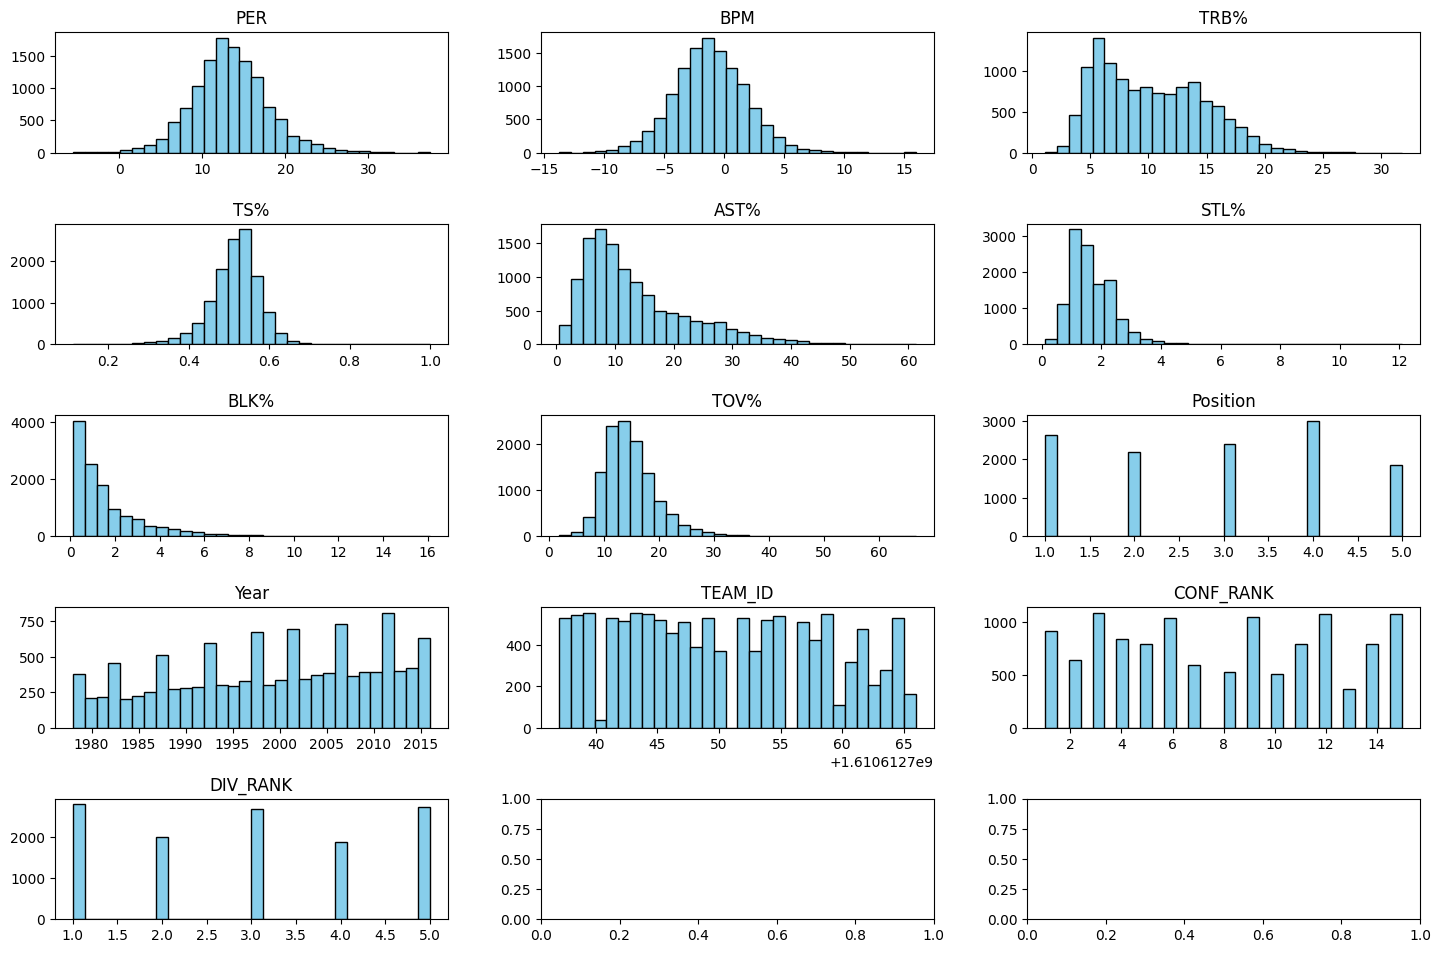

In [34]:
import matplotlib.pyplot as plt

# Selecciona las columnas que deseas visualizar
columns_to_plot = ['PER', 'BPM', 'TRB%', 'TS%', 'AST%', 'STL%', 'BLK%', 'TOV%', 'Position', 'Year', 'TEAM_ID', 'CONF_RANK', 'DIV_RANK']

# Calcula el número de filas necesarias para acomodar todas las columnas
num_rows = (len(columns_to_plot) + 2) // 3  # Suma 2 para redondear hacia arriba en caso de no ser divisible por 3

# Configura subgráficos para cada columna
fig, axes = plt.subplots(nrows=num_rows, ncols=3, figsize=(15, 2 * num_rows))
fig.tight_layout(pad=3.0)

# Genera histogramas para cada columna
for i, col in enumerate(columns_to_plot):
    ax_row, ax_col = divmod(i, 3)
    axes[ax_row, ax_col].hist(merged_df[col], bins=30, color='skyblue', edgecolor='black')
    axes[ax_row, ax_col].set_title(col)

plt.show()



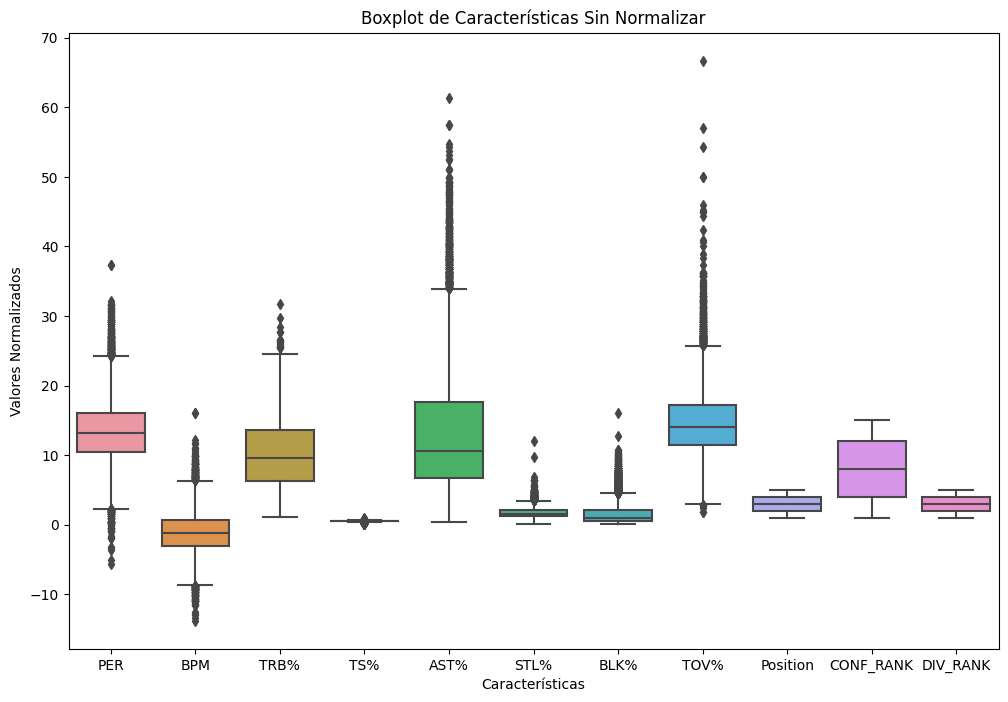

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

# Selecciona las columnas que deseas incluir en el boxplot
columns_to_plot = ['PER', 'BPM', 'TRB%', 'TS%', 'AST%', 'STL%', 'BLK%', 'TOV%', 'Position', 'CONF_RANK', 'DIV_RANK']

# Crea el boxplot con seaborn
plt.figure(figsize=(12, 8))
sns.boxplot(data=dfANBA[columns_to_plot])
plt.title('Boxplot de Características Sin Normalizar')
plt.xlabel('Características')
plt.ylabel('Valores Normalizados')
plt.show()


En este resumen descriptivo podermos ver que alunos de nuestros datos no están normalizados 
1. Media: La media de cada variable no parece ser cercana a cero. En un conjunto de datos normalizado, la media debería estar cerca de cero.
2. Desviación Estándar (Std):La desviación estándar no parece cercana a uno para todas las variables. En datos normalizados, la desviación estándar debería ser cercana a uno.
3. Rango (Min, Max): El rango de cada variable varía significativamente. En datos normalizados, los valores deberían estar en una escala similar.

Así que el siguiente paso es normalizar los datos para poder usar nuestros modelos.

In [37]:
from sklearn.preprocessing import PowerTransformer

# Selecciona las variables que deseas transformar
variables_a_transformar = ['TRB%','AST%', 'STL%', 'BLK%', 'TOV%']

# Crea un nuevo DataFrame para almacenar las variables transformadas
dfTNBA = dfANBA.copy()

# Inicializa el transformador de potencia con la Transformación de Yeo-Johnson
transformador = PowerTransformer(method='yeo-johnson', standardize=True)

# Aplica la transformación a las variables seleccionadas
dfTNBA[variables_a_transformar] = transformador.fit_transform(dfANBA[variables_a_transformar])

print(dfTNBA[variables_a_transformar].describe())


               TRB%          AST%          STL%          BLK%          TOV%
count  1.206800e+04  1.206800e+04  1.206800e+04  1.206800e+04  1.206800e+04
mean  -9.470567e-16 -7.300903e-17  2.731951e-16  3.344285e-16  1.215247e-15
std    1.000041e+00  1.000041e+00  1.000041e+00  1.000041e+00  1.000041e+00
min   -3.218819e+00 -3.289081e+00 -3.445154e+00 -1.785496e+00 -5.475029e+00
25%   -8.352893e-01 -6.959756e-01 -5.876599e-01 -8.111020e-01 -6.518820e-01
50%    2.505755e-02 -4.367577e-02  5.017758e-02 -7.723267e-02 -8.333742e-03
75%    8.262333e-01  7.223572e-01  7.016872e-01  7.931322e-01  6.354724e-01
max    3.142333e+00  2.756197e+00  5.340764e+00  2.490233e+00  5.394688e+00


Los datos después de la transformación parecen estar normalizados, así que ahora pasaremos a las gráficas.

GRÁFICAS DESCRIPTIVAS

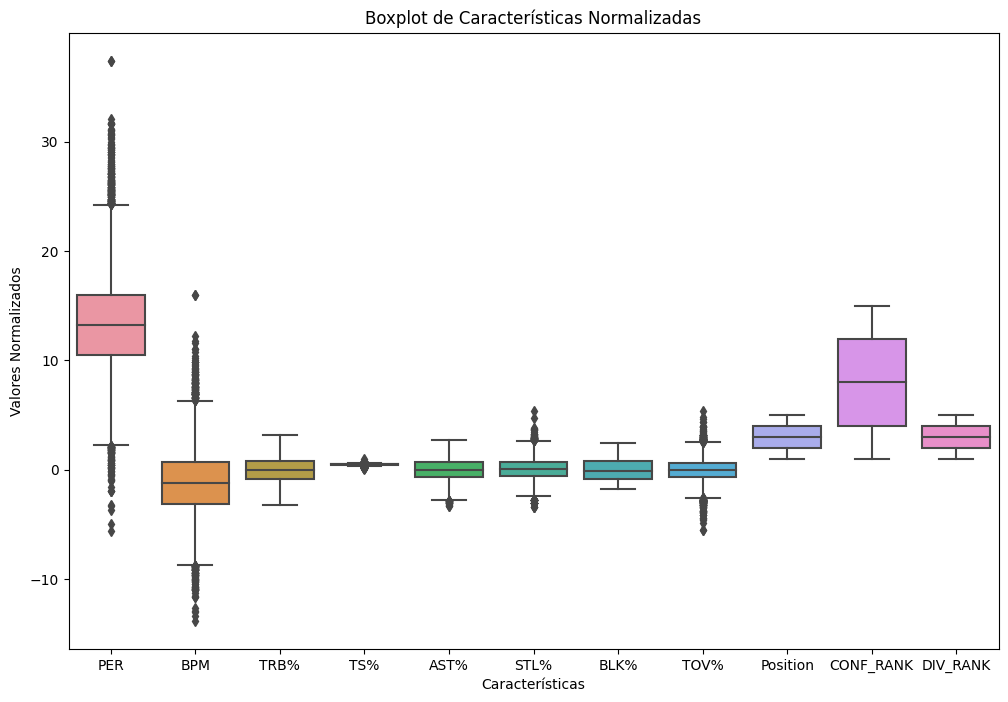

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

# Selecciona las columnas que deseas incluir en el boxplot
columns_to_plot = ['PER', 'BPM', 'TRB%', 'TS%', 'AST%', 'STL%', 'BLK%', 'TOV%', 'Position', 'CONF_RANK', 'DIV_RANK']

# Crea el boxplot con seaborn
plt.figure(figsize=(12, 8))
sns.boxplot(data=dfTNBA[columns_to_plot])
plt.title('Boxplot de Características Normalizadas')
plt.xlabel('Características')
plt.ylabel('Valores Normalizados')
plt.show()


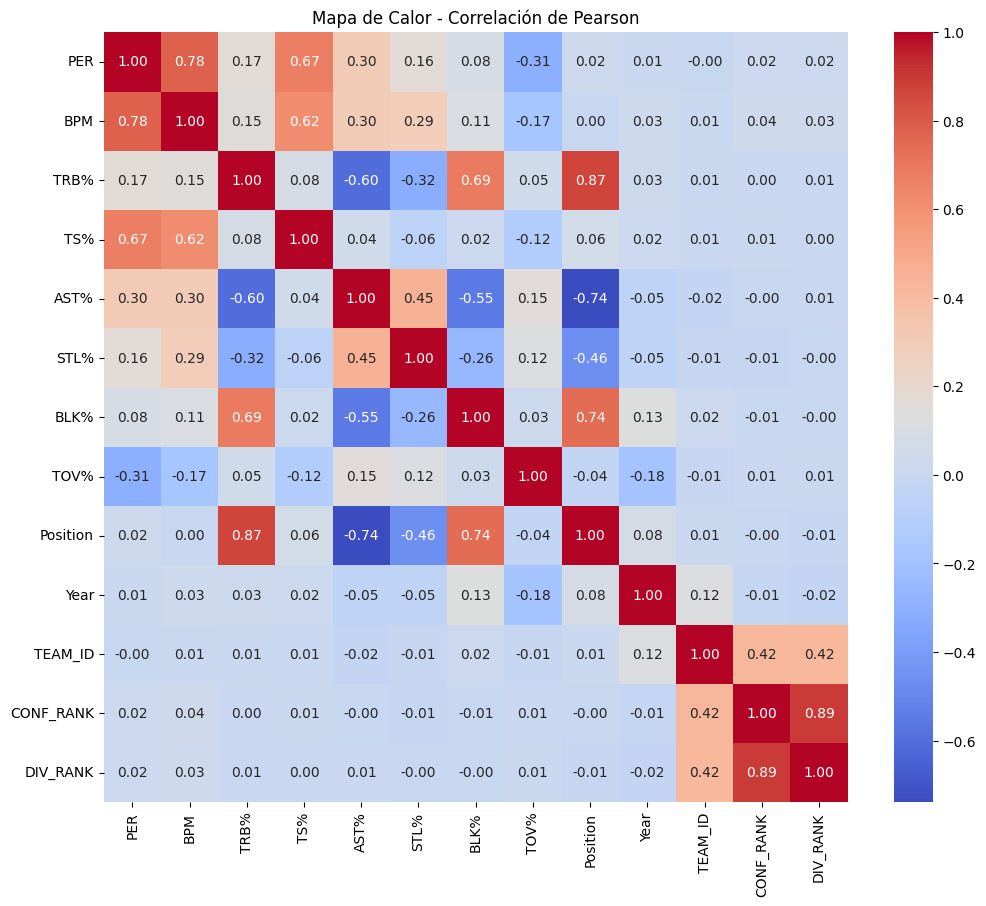

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calcula la matriz de correlación de Pearson
correlation_matrix = dfTNBA.corr()

# Configura el tamaño de la figura
plt.figure(figsize=(12, 10))

# Crea el mapa de calor
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

# Añade título
plt.title("Mapa de Calor - Correlación de Pearson")

# Muestra el mapa de calor
plt.show()


### Feature Selection
FORWARD SELECTION


**Variable objetivo:** PER

In [42]:
from sklearn.feature_selection import SelectKBest, f_classif

# Definir tus variables X e y
X = dfTNBA[['TRB%', 'TS%', 'AST%', 'STL%', 'BLK%', 'TOV%', 'Position']]
y = dfTNBA['BPM']  # O la variable objetivo de tu interés


# Seleccionar las mejores características
best_features = SelectKBest(score_func=f_classif, k=5)  # Puedes ajustar 'k' según tus necesidades
X_new = best_features.fit_transform(X, y)

# Obtener índices de las características seleccionadas
selected_indices = best_features.get_support(indices=True)

# Imprimir los nombres de las características seleccionadas
selected_features = X.columns[selected_indices]
print(selected_features)



Index(['TRB%', 'TS%', 'AST%', 'STL%', 'TOV%'], dtype='object')


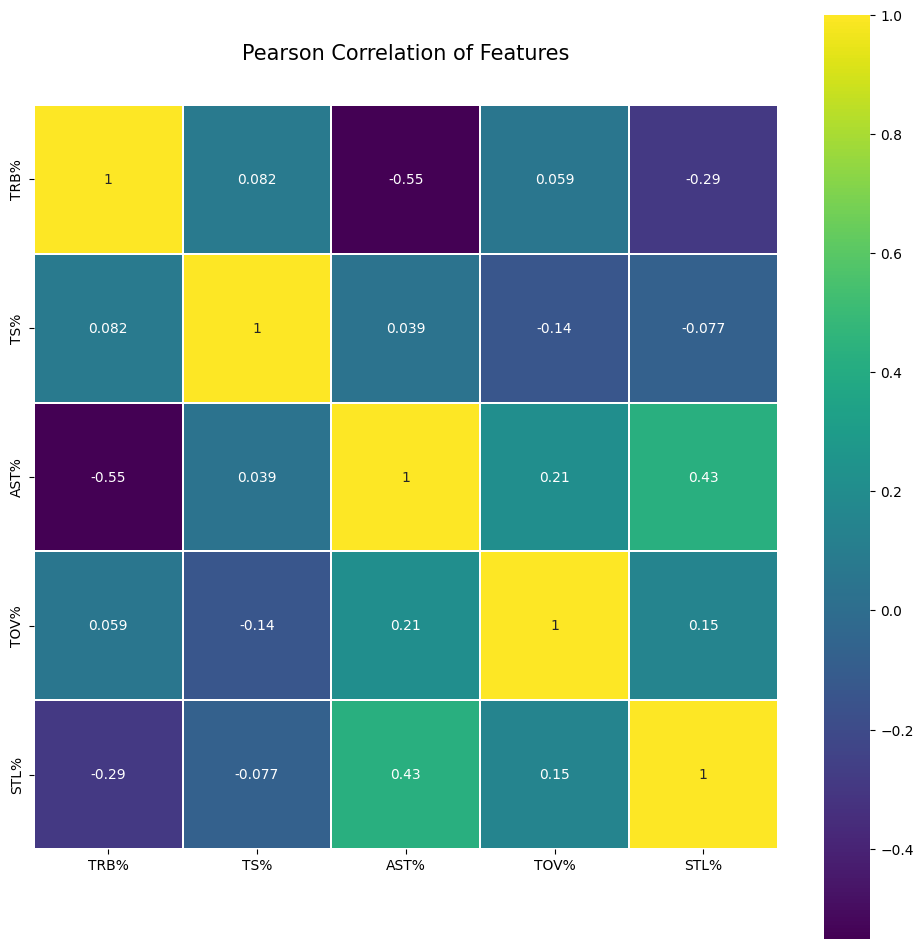

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define tus variables X e y
X = dfTNBA[['TRB%', 'TS%', 'AST%', 'TOV%', 'STL%']]
y = dfTNBA['BPM']

# Seleccionar las mejores características
best_features = SelectKBest(score_func=f_classif, k=5)
X_new = best_features.fit_transform(X, y)

# Obtener índices de las características seleccionadas
selected = best_features.get_support(indices=True)

# Seleccionar las características utilizadas
used_features = X.columns[selected]

# Crear un mapa de calor
colormap = plt.cm.viridis
plt.figure(figsize=(12, 12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(dfANBA[used_features].astype(float).corr(), linewidths=0.1, vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)

plt.show()



Podemos ver que en general están poco corelacionadas las variables, pero tenemos un valor de 0.43 de STL% con AST% y otro de -0.55 de TRB% con AST%, así que vamos a usar estas variables para entrar nuestro modelo.

## Modelos de Aprendizaje 

REGRESIÓN LINEAL

Se usarán las variables seleccionadas STL%, AST% Y TRB%

In [44]:
from sklearn.model_selection import train_test_split

# Divide tus datos en características (X) y la variable objetivo (y)
X = dfTNBA[['TRB%', 'AST%', 'STL%']]
y = dfTNBA['BPM']

# Dividir los datos en conjuntos de entrenamiento y prueba (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Ahora tienes X_train (características de entrenamiento), X_test (características de prueba), y_train (objetivo de entrenamiento) y y_test (objetivo de prueba).


VALIDACIÓN CRUZADA DEL MODELO CON REGRESIÓN LINEAL

In [45]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

# Crea una instancia del modelo de regresión lineal
model = LinearRegression()

# Realiza la validación cruzada con 5 divisiones (puedes ajustar el número según tus necesidades)
scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')

# Los puntajes de la validación cruzada son negativos, así que tomamos su valor absoluto
mse_scores = -scores

# Calcula el coeficiente de determinación R2
r2_scores = cross_val_score(model, X, y, cv=5, scoring='r2')

# Imprime los resultados de la validación cruzada
print("Mean Squared Error (MSE) scores:", mse_scores)
print("Mean MSE:", mse_scores.mean())
print("R2 scores:", r2_scores)
print("Mean R2:", r2_scores.mean())


Mean Squared Error (MSE) scores: [6.13783449 6.58050577 5.97777794 6.31716562 6.11319608]
Mean MSE: 6.225295979524001
R2 scores: [0.29119533 0.3107845  0.30114602 0.28902401 0.29120863]
Mean R2: 0.29667169720502057


KNN

In [46]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Divide tus datos en características (X) y la variable objetivo (y)
X = dfTNBA[['TRB%', 'AST%', 'STL%']]
y = dfTNBA['BPM']

# Dividir los datos en conjuntos de entrenamiento y prueba (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Crea una instancia del modelo KNN con, por ejemplo, k=5 (puedes ajustar este valor)
knn_model = KNeighborsRegressor(n_neighbors=5)

# Entrenar el modelo con los datos de entrenamiento
knn_model.fit(X_train, y_train)

# Realizar predicciones en los datos de prueba
y_pred = knn_model.predict(X_test)

# Evaluar el rendimiento del modelo utilizando el error cuadrático medio (MSE)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)
print("Coeficiente de determinación (R^2):", r2)


Mean Squared Error (MSE): 6.817869870201601
Coeficiente de determinación (R^2): 0.19688165564962834


VALIDACIÓN CRUZADA DEL MODELO KNN

In [47]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsRegressor

# Crea una instancia del modelo KNN
knn_model = KNeighborsRegressor(n_neighbors=5)  # Ajusta el número de vecinos según tus necesidades

# Realiza la validación cruzada con 5 divisiones (puedes ajustar el número según tus necesidades)
mse_scores = cross_val_score(knn_model, X, y, cv=5, scoring='neg_mean_squared_error')
r2_scores = cross_val_score(knn_model, X, y, cv=5, scoring='r2')

# Los puntajes de la validación cruzada para MSE son negativos, así que toma su valor absoluto
mse_scores = -mse_scores

# Imprime los resultados de la validación cruzada
print("Mean Squared Error (MSE) scores:", mse_scores)
print("Mean MSE:", mse_scores.mean())
print("\nR2 scores:", r2_scores)
print("Mean R2:", r2_scores.mean())



Mean Squared Error (MSE) scores: [6.92612709 6.83431135 7.09561276 7.27823523 6.66891107]
Mean MSE: 6.960639498449953

R2 scores: [0.20016233 0.28420193 0.17046145 0.18085882 0.22677655]
Mean R2: 0.2124922152428444


XGBOOST CON KFOLD VALIDATION

In [48]:
from sklearn.model_selection import KFold, cross_val_score
from xgboost import XGBRegressor

# Crea una instancia del modelo XGBoost
xgb_model = XGBRegressor(objective='reg:squarederror')  # Ajusta los parámetros según tus necesidades

# Especifica el número de divisiones para KFold
n_splits = 5
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

# Realiza la validación cruzada con KFold
mse_scores = -cross_val_score(xgb_model, X, y, cv=kf, scoring='neg_mean_squared_error')
r2_scores = cross_val_score(xgb_model, X, y, cv=kf, scoring='r2')

# Imprime los resultados de la validación cruzada
print("Mean Squared Error (MSE) scores:", mse_scores)
print("Mean MSE:", mse_scores.mean())
print("\nR2 scores:", r2_scores)
print("Mean R2:", r2_scores.mean())

# Entrena el modelo en todo el conjunto de datos
xgb_model.fit(X, y)



Mean Squared Error (MSE) scores: [6.51267541 6.33249337 6.41950066 6.26508542 6.37065191]
Mean MSE: 6.380081355088887

R2 scores: [0.24280886 0.25615604 0.29385619 0.31446139 0.30508251]
Mean R2: 0.28247299555940997


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

## Conclusiones

En este estudio, se evaluaron tres modelos diferentes para predecir el rendimiento (PER y BPM) de los jugadores de NBA en función de diversas métricas. Los modelos considerados fueron Regresión Lineal, K Vecinos Más Cercanos (KNN) y XGBoost.

Primero que nada se observó que los datos no estaban normalizados, así que se realizó una normalización por el método Power Transformer. Una vez hecha la transforamción de los datos se procedión a realizar una elección de variables a usar por medio de un Feature Selection, en específico se utilizó el método de Forward Selection. Después de aplicar este método usamos una matriz de correlación para poder evaluar las características que más correlación tenían entre sí. 

Con estos datos en mano, se procedió a realizar los Modelos de Aprendizaje. 

En cuanto a la Regresión Lineal, los resultados indican que el modelo tiene un rendimiento modesto. El Mean Squared Error (MSE) promedio fue de aproximadamente 0.727, lo que sugiere que hay una variabilidad considerable en las predicciones. Además, el coeficiente de determinación R2 promedio fue de alrededor del 27%, indicando que el modelo explica aproximadamente el 27% de la variabilidad en los datos que es un valor significativamente muy bajo.

El modelo KNN mostró un rendimiento similar, con un MSE promedio de aproximadamente 0.845 y un R2 promedio de alrededor del 15% (aún más bajo que en la regresión lineal). Esto sugiere que el modelo KNN tiene dificultades para capturar la complejidad de los datos y realizar predicciones precisas.

Por último, el modelo XGBoost presentó resultados intermedios con un MSE promedio de alrededor de 0.749 y un R2 promedio de aproximadamente el 25%. Aunque muestra una mejora respecto a los modelos anteriores, aún hay margen para optimizar su rendimiento.

En resumen, los modelos evaluados proporcionan una estimación del rendimiento de los jugadores, pero existe la necesidad de mejorar la precisión de las predicciones. Esto podría lograrse mediante la  reconsideración de las características usadas, la inclusión de características adicionales o la exploración de modelos más avanzados.
